In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

main_dataset = pd.read_excel("./buffer/1-main_dataset.xlsx")
main_dataset_prepared = pd.read_excel("./buffer/2-main_dataset_prepared.xlsx")

main_dataset.drop(columns=main_dataset.columns[0], axis=1, inplace=True)
main_dataset_prepared.drop(columns=main_dataset_prepared.columns[0], axis=1, inplace=True)

numeric_features = main_dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_features = main_dataset.select_dtypes(include=['object']).columns

In [24]:
data2 = main_dataset.loc[:, categorical_features]
data3 = main_dataset.loc[:, numeric_features]
data2_prepared = pd.get_dummies(data2)

data4 = data2_prepared.join(data3)
cor_att = data4.corr()[:1]

cor_att.where(abs(cor_att) > 0.05, inplace=True)
cor_att.dropna(inplace=True, axis=1)
cor_att.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,EducationField_Human Resources,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Age,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Average
Attrition_No,1.0,-1.0,0.074457,-0.115143,-0.080768,-0.091573,0.087716,0.090984,-0.175419,0.159205,0.170338,0.134392,0.156199,0.102142,0.102847,0.062756,-0.201688


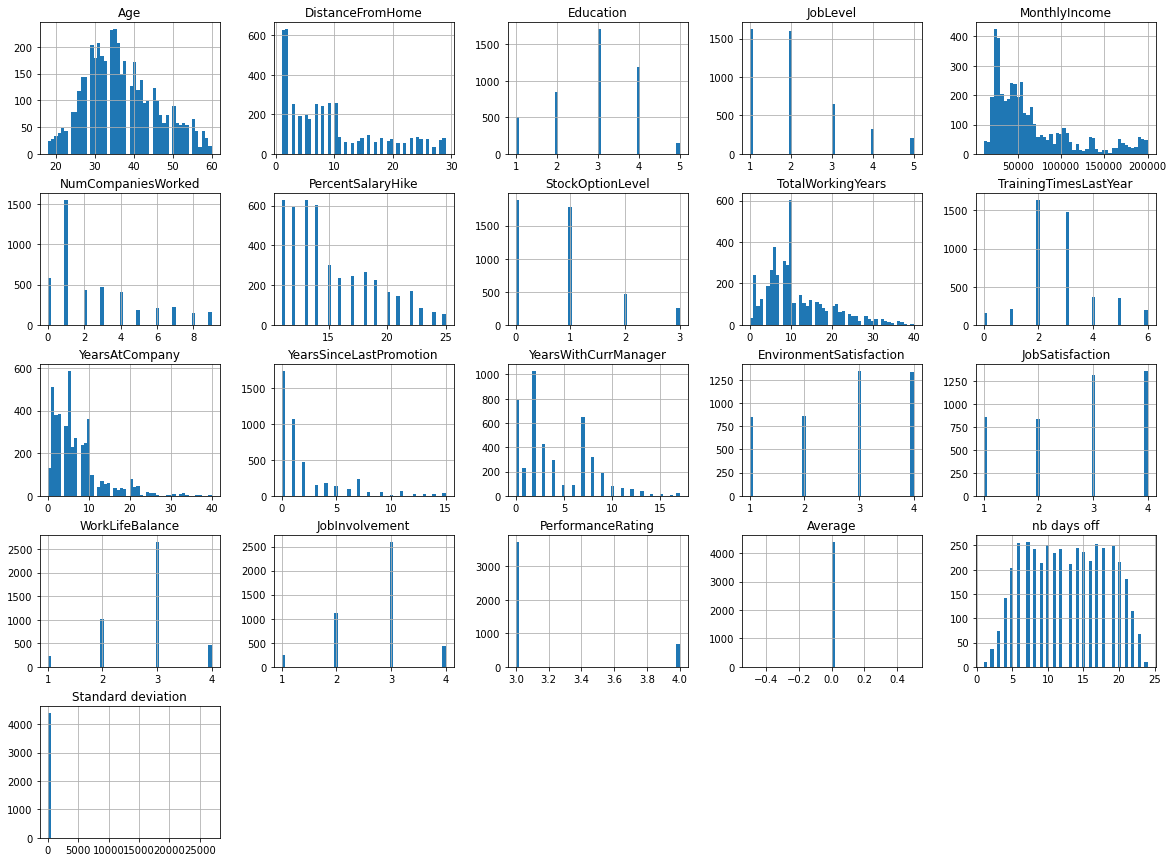

In [25]:
main_dataset["Average"] = main_dataset["Average"].values.astype(np.int64)/1e9/60/60
main_dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
main_dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Average,nb days off,Standard deviation
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,0,3.0,4.0,2.0,3,3,0.0,17,26928.364188
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,1,4,3.0,2.0,4.0,2,4,0.0,13,6751.608964
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0,3,2.0,2.0,1.0,3,3,0.0,7,0.023118
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,7,5,4.0,4.0,3.0,2,3,0.0,14,0.022557
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,0,4,4.0,1.0,3.0,3,3,0.0,4,0.025007


#### Etude du champ "Age"

- Nous constatons que l'age moyen est de 36 ans (assez jeune).
- L'age minimal est de 18 ans et le max de 60 ans.
- Avec un écart type de 9, l'écart des ages est bon (mélange d'age).
- En examinant les quartile nous voyons que le panel d'age est compris entre 30 et 43 ans

In [27]:
main_dataset["Age"].describe()

count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

#### Etude du champ "MonthlyIncome"
- La moyenne des salaire est de  65059.844186/an.
- L'écart type nous montre qu'il y a un grand écart entre les petits et grands salaires.
- Nous constatons des extremes importants.

In [28]:
main_dataset["MonthlyIncome"].describe()

count      4410.000000
mean      65029.312925
std       47068.888559
min       10090.000000
25%       29110.000000
50%       49190.000000
75%       83800.000000
max      199990.000000
Name: MonthlyIncome, dtype: float64

#### Etude du champ "WorkLifeBalance"
- La majorité des employés ont un bon équilibre entre leurs vie/travail.

In [11]:
main_dataset['WorkLifeBalance'].value_counts()

3.0    2660
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64

#### Etude du champ "JobSatisfaction"
- Les employées sont majoritairement satisfait de leurs emplois.

In [12]:
main_dataset["JobSatisfaction"].value_counts()


4.0    1367
3.0    1323
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64

#### Etude du champ "EnvironmentSatisfaction"
- Leurs environnement de travail est egalement majortairement satisfaisant pour les salariés.

In [13]:
main_dataset["EnvironmentSatisfaction"].value_counts()

3.0    1350
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64

#### Etude du champ "YearsAtCompany"

- Le nombre d'années passé dans l'entreprise reste normal (7 ans en moyenne).
- l'étendue des valeurs est très grande (de 0 à 40ans).

In [32]:
main_dataset["YearsAtCompany"].describe()

count    4410.000000
mean        7.008163
std         6.125135
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

## Hypothèse sur le jeu de données

A la suite de cette petite étude sur nos jeux de données, plusieurs hypothèses en ressortent :

- Les facteurs que nous supposons pouvant influer sur le modèle sont :
    - "JobSatisfaction"
    - "JobEnvironnement"
    - "WorklifeBalance"
    - Dans l'ensemble, les paramètres qui jouent sur le bien être des employés.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'WorkLifeBalance'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
     

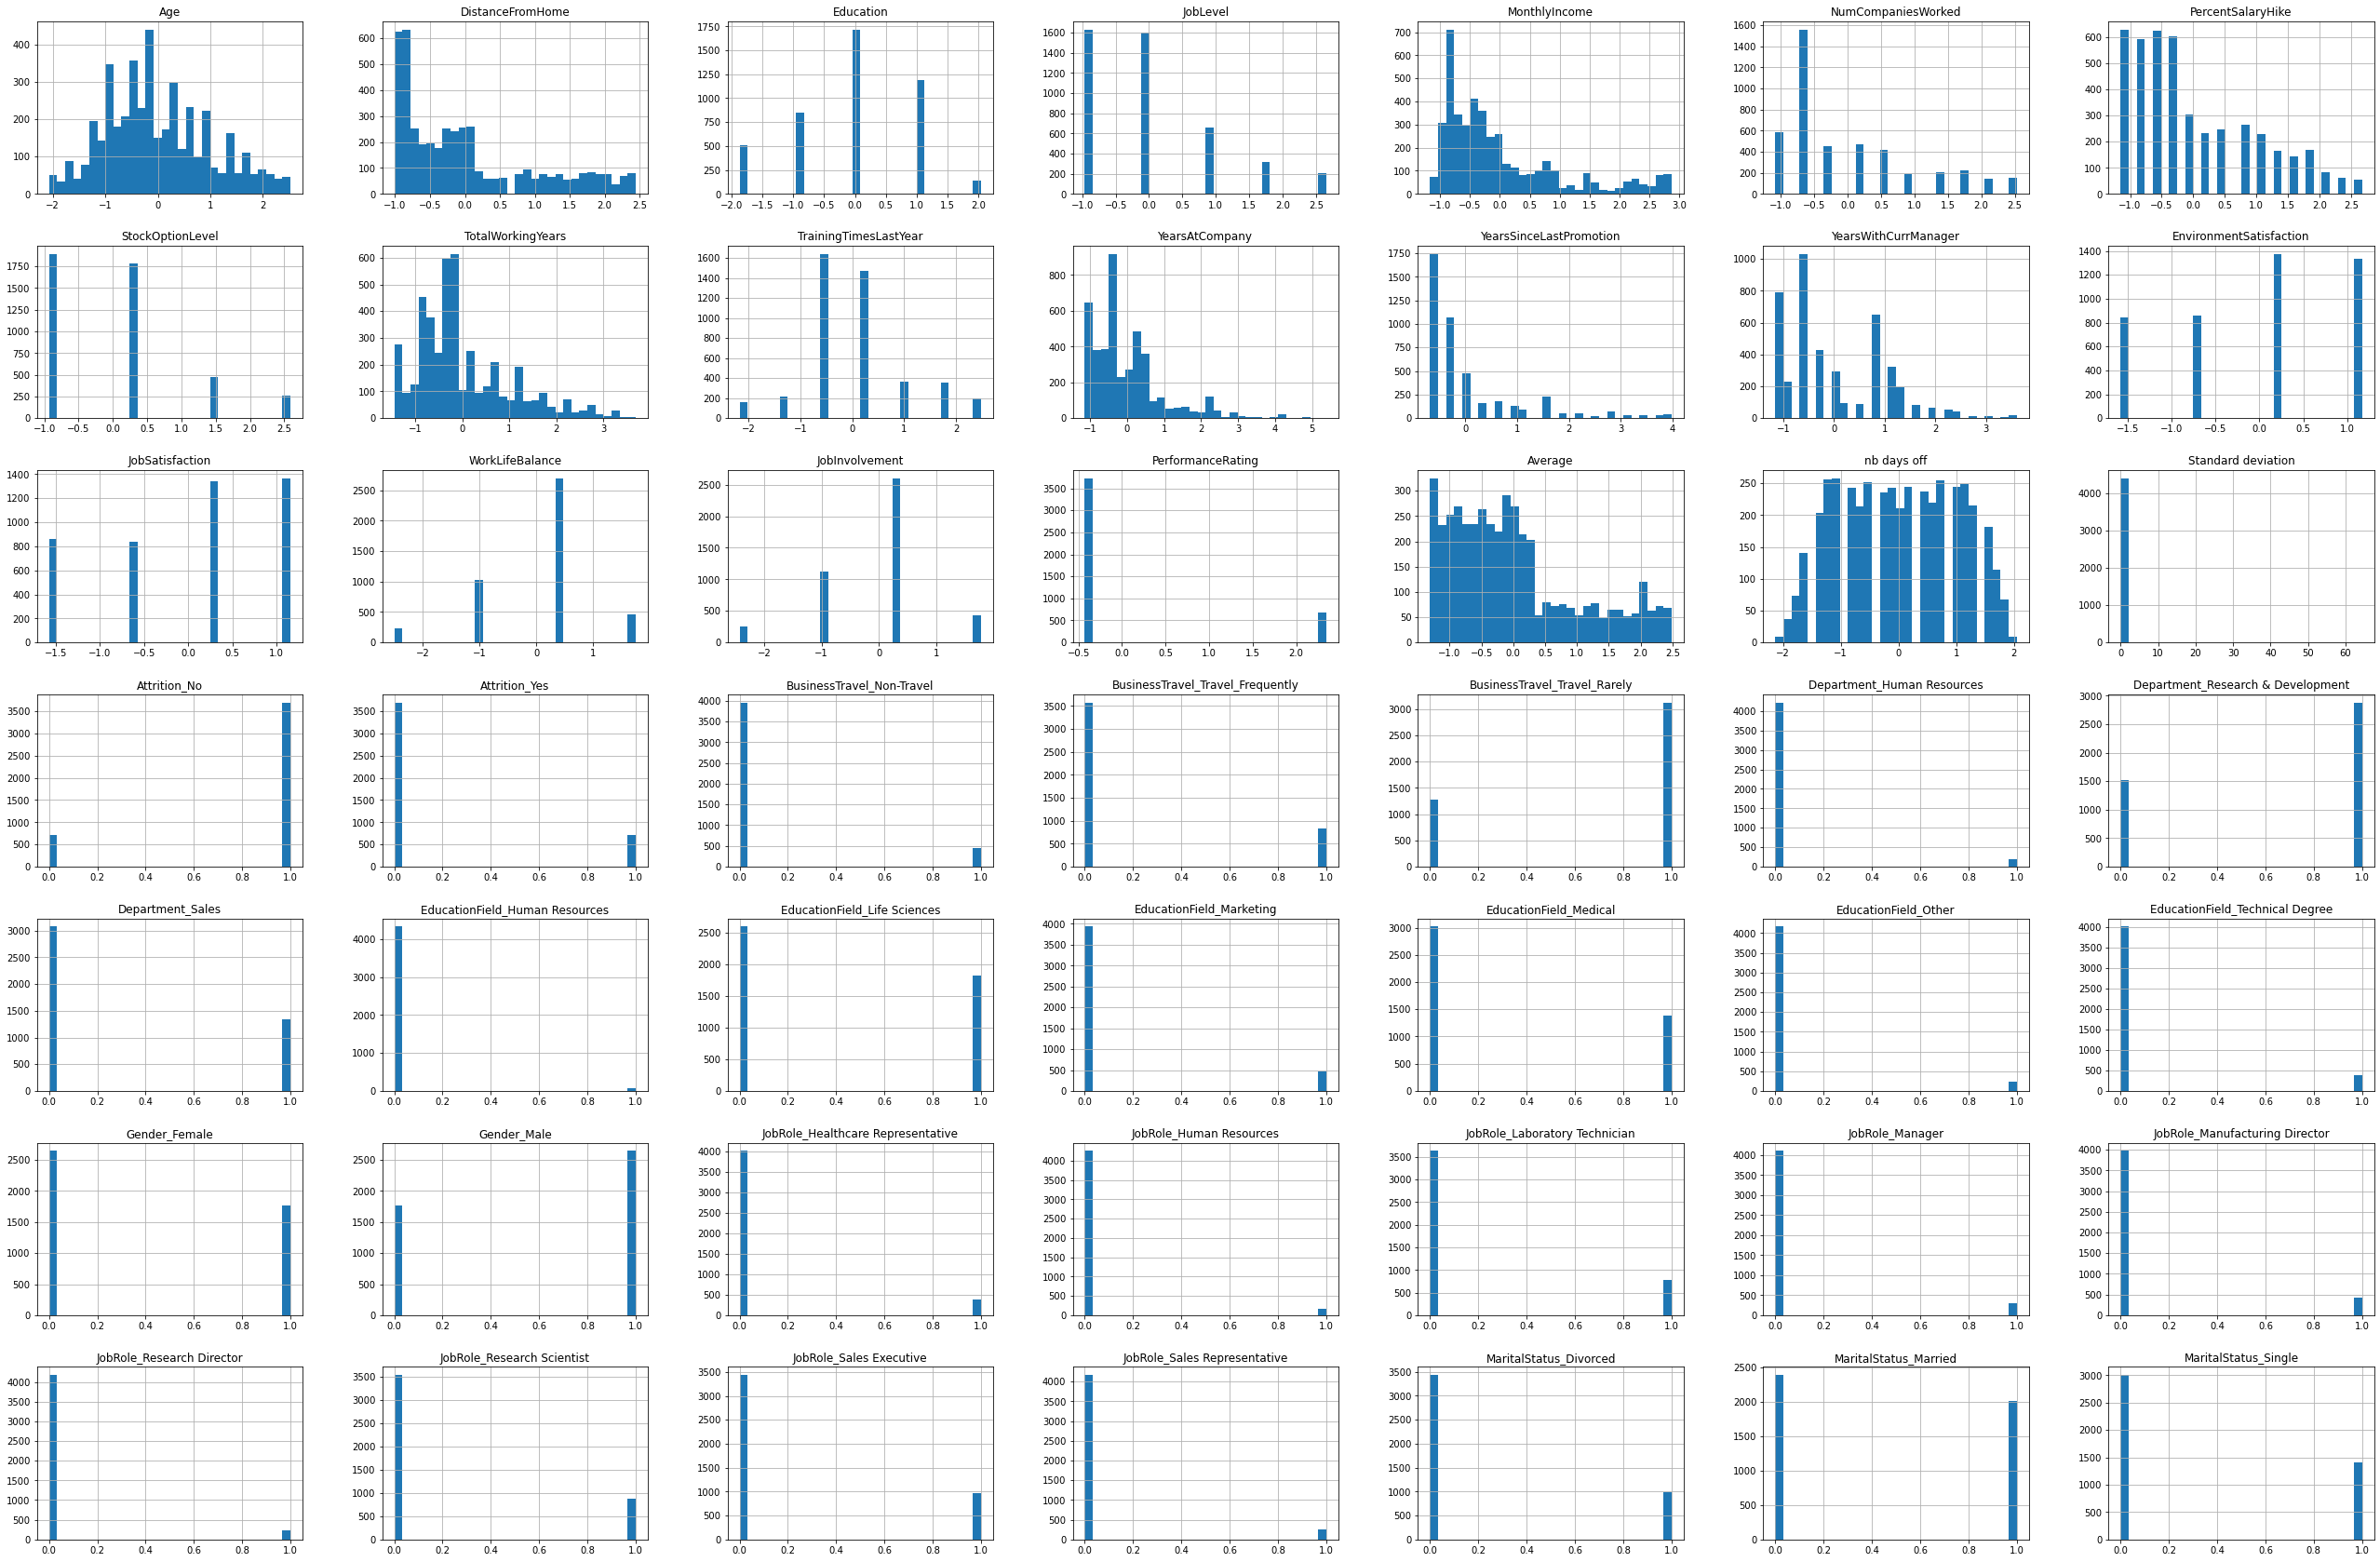

In [8]:
main_dataset_prepared.hist(bins=30, figsize=(45,30))

Matrice de corrélation de nos attributs

(49.5, -0.5)

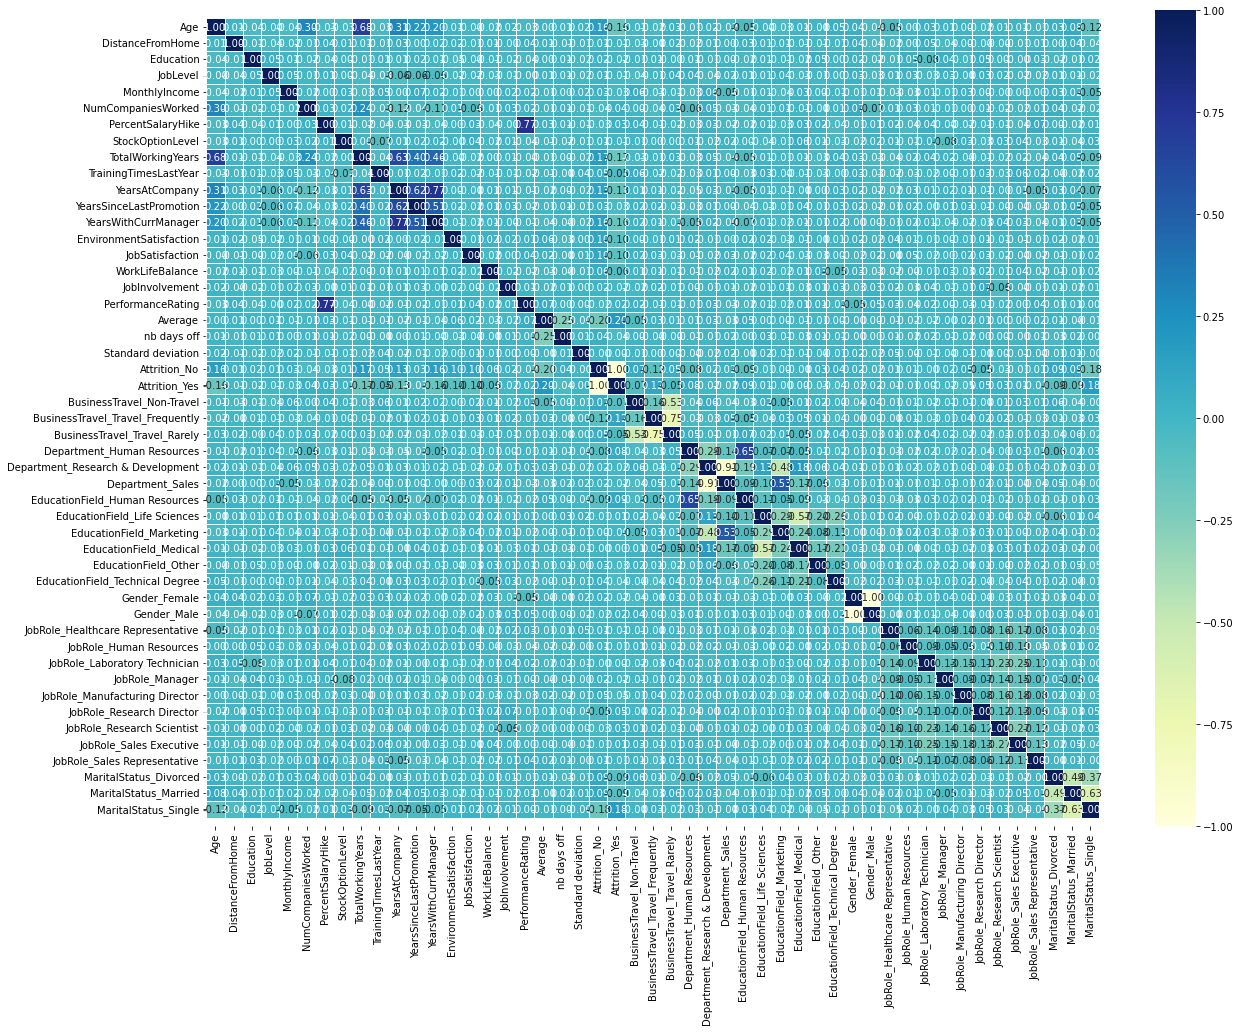

In [35]:
import seaborn as sns

corr_matrix = main_dataset_prepared.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)